In [1]:
import tensorflow_probability as tfp
tfd = tfp.distributions
import pandas as pd
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn.datasets import fetch_california_housing

In [2]:
# Load the California Housing dataset
housing = fetch_california_housing(as_frame=True)

# Create a Pandas DataFrame from the dataset
data = pd.DataFrame(housing.data, columns=housing.feature_names)

# Add the target variable to the DataFrame
data['target'] = housing.target

In [3]:
import sys
sys.path.append('..')
from xDL.models.NAMLSS import NAMLSS

In [4]:
namlss = NAMLSS(
    "target ~  -1 + CubicSplineNet(MedInc, n_knots=[15]) + CubicSplineNet(Latitude, n_knots=[15]) + CubicSplineNet(Longitude, n_knots=[15]) + CubicSplineNet(AveRooms, n_knots=[15])", 
    data=data, 
    family="Normal", 
    feature_dropout=0.0001
    )

In [5]:
def KL_Divergence(y_true, y_hat):
    t = tfd.Normal(loc=y_true, scale=tf.math.reduce_std(y_true))
    p = tfd.Normal(loc=y_hat, scale=tf.math.reduce_std(y_true))  
    kl = tf.reduce_mean(tfd.kl_divergence(t, p, allow_nan_stats=True))
    return kl

namlss.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss=namlss.NegativeLogLikelihood, 
    metrics=KL_Divergence
    )

# Train the model
namlss.fit(namlss.training_dataset, epochs=100, validation_data=namlss.validation_dataset)

# Evaluate the model
loss = namlss.evaluate(namlss.validation_dataset)
print("Test Loss:", loss)

Epoch 1/100
17/17 [==============================] - 3s 29ms/step - loss: 14.7162 - KL_Divergence: 2.3964 - val_loss: 10.5647 - val_KL_Divergence: 2.1528
Epoch 2/100
17/17 [==============================] - 0s 10ms/step - loss: 8.7236 - KL_Divergence: 2.1327 - val_loss: 7.2418 - val_KL_Divergence: 2.1372
Epoch 3/100
17/17 [==============================] - 0s 11ms/step - loss: 6.5475 - KL_Divergence: 1.9131 - val_loss: 5.8870 - val_KL_Divergence: 1.7207
Epoch 4/100
17/17 [==============================] - 0s 10ms/step - loss: 5.5821 - KL_Divergence: 1.7606 - val_loss: 5.2643 - val_KL_Divergence: 1.6710
Epoch 5/100
17/17 [==============================] - 0s 11ms/step - loss: 5.0596 - KL_Divergence: 1.6988 - val_loss: 4.9002 - val_KL_Divergence: 1.6641
Epoch 6/100
17/17 [==============================] - 0s 11ms/step - loss: 4.7409 - KL_Divergence: 1.5815 - val_loss: 4.5863 - val_KL_Divergence: 1.4896
Epoch 7/100
17/17 [==============================] - 0s 11ms/step - loss: 4.4822 - KL_

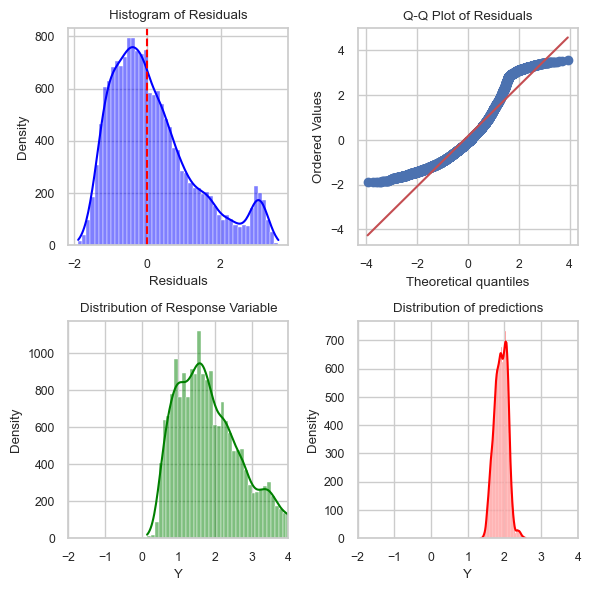

In [6]:
namlss.analytics_plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


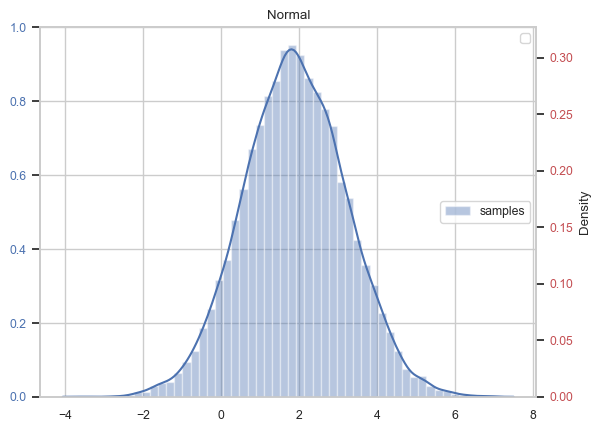

In [7]:
namlss.plot_dist()

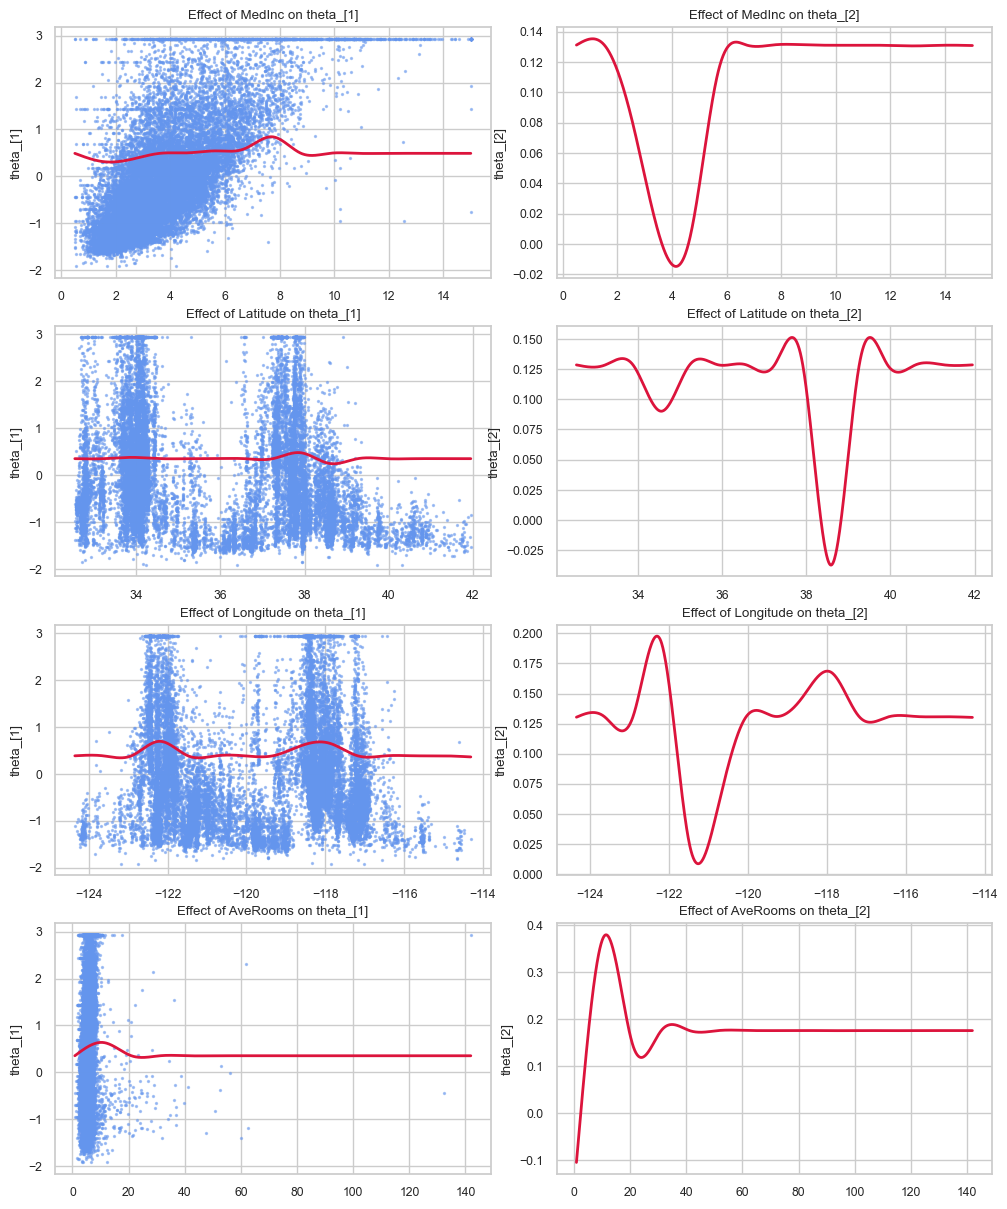

In [8]:
namlss.plot()